In [3]:
%%capture
!pip install python_speech_features
!gdown https://drive.google.com/uc?id=1m1yb-jGtUhMplUrNVRptctW87hQ7TcCO
!unzip '/content/Copy of LUMS_FALL2020_PROJECT_DATA.zip'

In [132]:
import python_speech_features as mfcc
from scipy.io.wavfile import read
import numpy as np ,os ,pandas as pd
import matplotlib.pyplot as plt

In [28]:
Gender_Recognition = os.path.join(os.getcwd() ,'Gender_Recognition')
Gender_Recognition_train = os.path.join(Gender_Recognition , 'Train') 
Gender_Recognition_test  = os.path.join(Gender_Recognition , 'Test')
Gender_Recognition_valid = os.path.join(Gender_Recognition , 'Valid')

In [45]:
Speaker_Recognition = os.path.join(os.getcwd() ,'Speaker_Recognition')
Speaker_Recognition_train = os.path.join(Speaker_Recognition , 'Train') 
Speaker_Recognition_test  = os.path.join(Speaker_Recognition , 'Test')
Speaker_Recognition_valid = os.path.join(Speaker_Recognition , 'Valid')

In [242]:
def get_features(path):
    sr, audio = read(path)
    features = mfcc.mfcc(audio, sr, 0.025, 0.01, 13, appendEnergy = True)
    return np.mean(features, axis=0)

def Recognition(path ,Label_Type):
  Paths = []
  Lables = []
  lis =  os.listdir(path)
  
  if Label_Type == 'Gender':
    labels = list(map(lambda x:x[-1], lis))
  elif Label_Type =='Speaker':
    labels = list(map(lambda x:x[:-2], lis))
  else:
    print("Either speaker or Gender")
    return
  
  for i in zip(lis ,labels):
    temp_path = os.path.join(path, i[0])
    buzz = os.listdir(temp_path)
    buzz = list(map(lambda x:os.path.join(temp_path ,x) ,buzz))
    tuzz = len(buzz)*[i[1]]
    Paths+=buzz
    Lables+=tuzz
  data = {'Data':Paths,'Label':Lables}
  df = pd.DataFrame(data)
  df['Features']  = df.Data.apply(get_features)
  tempoooo = df['Features'].to_numpy()
  XXX = np.zeros((len(df) ,13) ,dtype=np.float32)
  YYY = np.zeros((len(df),len(df.Label.unique())))
  
  count = 0
  for i in tempoooo:
    XXX[count]=i
    count+=1
  
  if Label_Type =='Gender':
    count = 0
    for i in df.Label:
      if i=='M': # for male index 0 and female index 1 
        YYY[count][0]=1
      if i=='F':
        YYY[count][1]=1
      count+=1
  return XXX ,YYY

In [245]:
train_x ,train_y = Recognition(Gender_Recognition_train ,'Gender')
test_x ,test_y = Recognition(Gender_Recognition_test ,'Gender')
valid_x ,valid_y = Recognition(Gender_Recognition_valid ,'Gender')

In [251]:
train_x = np.insert(train_x, 0, 1, axis=1)
test_x = np.insert(test_x, 0, 1, axis=1)

In [252]:
def softmax(x):
  expx = np.exp(x)
  return expx / expx.sum(axis=1, keepdims=True)

def cross_entropy_loss(y_pred, y_true):
  return -(y_true * np.log(y_pred)).sum()

In [275]:
def Softmax_regression(x, y, alpha, num_iters):
    m = x.shape[0]
    _ , n = x.shape
    _ , zzz = y.shape
    theta = np.random.normal(0, 0.1, size=(n, zzz))
    loss = list()
    for i in range(num_iters):
        h = softmax(x@theta) 
        J = cross_entropy_loss(h,y)
        loss.append(J)
        error  = h-y
        theta = theta - alpha/m * (x.T @ error)
    return loss, theta

In [276]:
loss, theta = Softmax_regression(train_x , train_y, 0.001,1000)

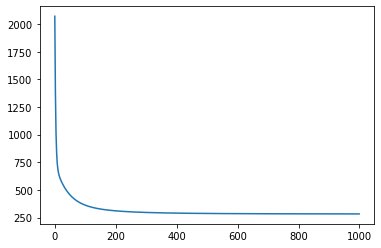

In [277]:
plt.plot(loss)

In [294]:
def pred(data , theta):
  return softmax(data@theta)
def test(test_x, test_y,theta):
    y_pred = pred(test_x,theta)
    y_hat = y_pred.argmax(axis=1)
    test_y = test_y.argmax(axis=1)
    accuracy = (y_hat == test_y).sum()/len(test_y)
    return accuracy

In [300]:
print('Accuracy on test_data is = {}'.format(test(test_x,test_y,theta)))

Accuracy on test_data is = 0.8352941176470589
